# 5 Feature Engineering
## Feature Creation
### Read in text

In [3]:
import pandas as pd
pd.set_option('display.max_colwidth', 100)

data = pd.read_csv('SMSSpamCollection', sep='\t')
data.columns = ['label', 'body_text']

data.head()

,label,body_text
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives around here though"
4,spam,FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for ...


### Create feature for text message length

In [4]:
data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(' '))

data.head()

,label,body_text,body_len
0,ham,Ok lar... Joking wif u oni...,24
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128
2,ham,U dun say so early hor... U c already then say...,39
3,ham,"Nah I don't think he goes to usf, he lives around here though",49
4,spam,FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for ...,116


### Create feature for % of text that is punctuation

In [5]:
import string

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count / (len(text) - text.count(' ')), 3)*100

data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

data.head()

,label,body_text,body_len,punct%
0,ham,Ok lar... Joking wif u oni...,24,25.0
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128,4.7
2,ham,U dun say so early hor... U c already then say...,39,15.4
3,ham,"Nah I don't think he goes to usf, he lives around here though",49,4.1
4,spam,FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for ...,116,6.9


### Create feature for % of text that is capitalized

In [9]:
import re

def count_cap(text):
    count = len(re.findall('[A-Z]', text))
    return round(count / (len(text) - text.count(' ')), 3)*100

data['cap%'] = data['body_text'].apply(lambda x: count_cap(x))

data.head()

,label,body_text,body_len,punct%,cap%
0,ham,Ok lar... Joking wif u oni...,24,25.0,8.3
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128,4.7,7.8
2,ham,U dun say so early hor... U c already then say...,39,15.4,5.1
3,ham,"Nah I don't think he goes to usf, he lives around here though",49,4.1,4.1
4,spam,FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for ...,116,6.9,6.0


## Evaluate created features

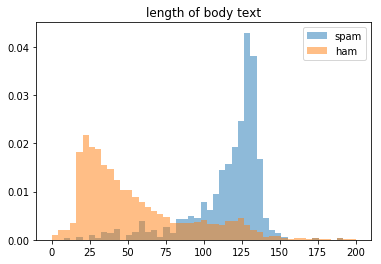

In [20]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

bins = np.linspace(0, 200, 50)

plt.hist(data[data['label']=='spam']['body_len'], bins, alpha=0.5, density=True, label='spam')
plt.hist(data[data['label']=='ham']['body_len'], bins, alpha=0.5, density=True, label='ham')
plt.legend(loc='upper right')
plt.title('length of body text')
plt.show()

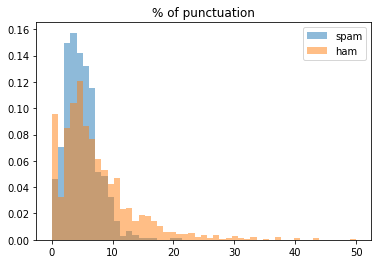

In [21]:
bins = np.linspace(0, 50, 50)

plt.hist(data[data['label']=='spam']['punct%'], bins, alpha=0.5, density=True, label='spam')
plt.hist(data[data['label']=='ham']['punct%'], bins, alpha=0.5, density=True, label='ham')
plt.legend(loc='upper right')
plt.title('% of punctuation')
plt.show()

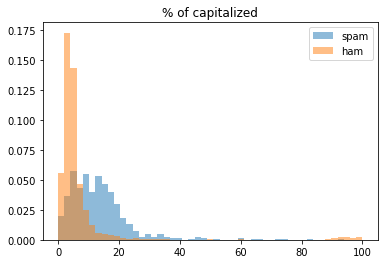

In [22]:
bins = np.linspace(0, 100, 50)

plt.hist(data[data['label']=='spam']['cap%'], bins, alpha=0.5, density=True, label='spam')
plt.hist(data[data['label']=='ham']['cap%'], bins, alpha=0.5, density=True, label='ham')
plt.legend(loc='upper right')
plt.title('% of capitalized')
plt.show()

## Transformations

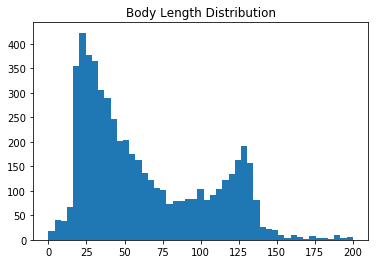

In [23]:
bins = np.linspace(0, 200, 50)

plt.hist(data['body_len'], bins)
plt.title('Body Length Distribution')
plt.show()

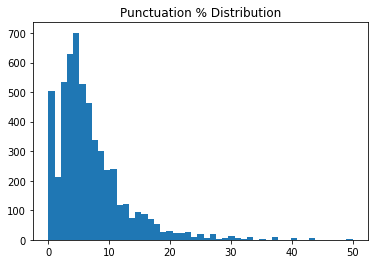

In [24]:
bins = np.linspace(0, 50, 50)

plt.hist(data['punct%'], bins)
plt.title('Punctuation % Distribution')
plt.show()

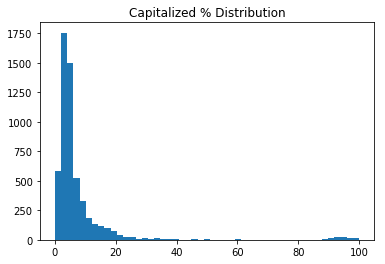

In [25]:
bins = np.linspace(0, 100, 50)

plt.hist(data['cap%'], bins)
plt.title('Capitalized % Distribution')
plt.show()

### Transform the punctuation % feature
#### Box-Cox Power Transformations

**Base Form**: $$ y^x $$

| X    | Base Form           |           Transformation               |
|------|--------------------------|--------------------------|
| -2   | $$ y ^ {-2} $$           | $$ \frac{1}{y^2} $$      |
| -1   | $$ y ^ {-1} $$           | $$ \frac{1}{y} $$        |
| -0.5 | $$ y ^ {\frac{-1}{2}} $$ | $$ \frac{1}{\sqrt{y}} $$ |
| 0    | $$ y^{0} $$              | $$ \log{y} $$             |
| 0.5  | $$ y ^ {\frac{1}{2}}  $$ | $$ \sqrt{y} $$           |
| 1    | $$ y^{1} $$              | $$ y $$                  |
| 2    | $$ y^{2} $$              | $$ y^2 $$                |

| Original Value    | Transformation           |           Transformed Value               |
|------|--------------------------|--------------------------|
| $$50$$   | $$ \frac{1}{50^2}=\frac{1}{2500} $$           | $$ 0.0004 $$      |
| $$50$$  |  $$ \frac{1}{50} $$           | $$ 0.02 $$        |
| $$50$$ | $$ \frac{1}{\sqrt{50}}=\frac{1}{7.07} $$ | $$ 0.14 $$ |
| $$50$$    | $$ \log{50} $$              | $$ 1.7$$             |
| $$50$$  |$$ \sqrt{50} $$  | $$ 7.07$$           |
| $$50$$    | $$ 50 $$             | $$ 50 $$                  |
| $$50$$    | $$ 50^2 $$             | $$ 2500 $$                |


**Process**
1. Determine what range of exponents to test
2. Apply each transformation to each value of your chosen feature
3. Use some criteria to determine which of the transformations yield the best distribution

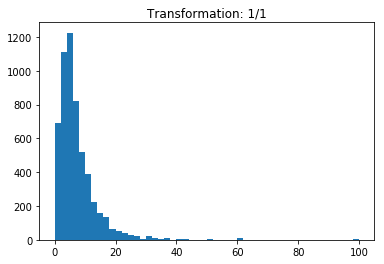

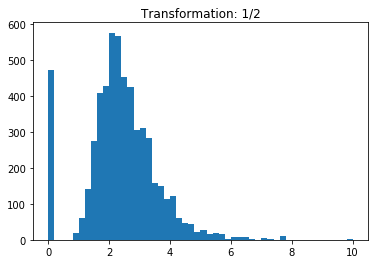

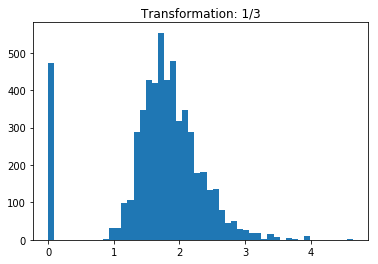

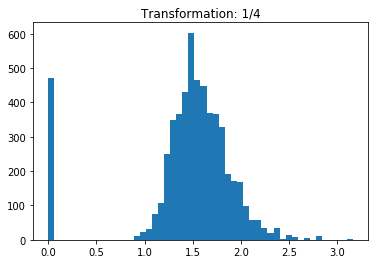

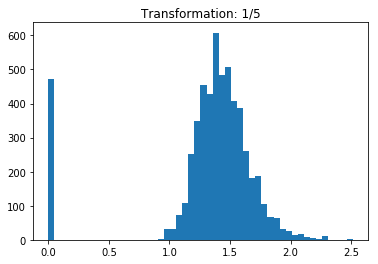

In [26]:
for i in range(1, 6):
    plt.hist(data['punct%']**(1/i), bins=50)
    plt.title('Transformation: 1/{}'.format(str(i)))
    plt.show()